In [1]:
import pandas as pd

# Load the dataset
file_path = "D:/SHRM/Projects/HR-Employee-Attrition-All.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
from sklearn.preprocessing import LabelEncoder

# Check for missing values
missing_values = df.isnull().sum()

# Encode categorical variables
df_cleaned = df.copy()
label_encoders = {}

for column in df_cleaned.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le

# Verify the transformation
df_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


C:\Users\vedit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[18:12:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




<Figure size 1000x600 with 0 Axes>

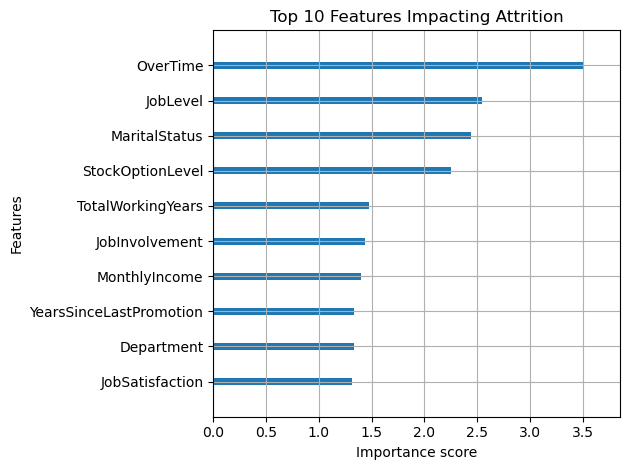

In [3]:
import pandas as pd                              # For data manipulation and analysis
import matplotlib.pyplot as plt                  # For static plotting of model insights
import seaborn as sns                            # For beautiful statistical plots (used in early EDA)
from sklearn.preprocessing import LabelEncoder   # To convert categorical text into numbers for modeling
from sklearn.model_selection import train_test_split  # For splitting data into training/testing sets
from xgboost import XGBClassifier, plot_importance    # For predictive modeling and feature importance
import dash                                      # Dash framework for building web-based dashboards
from dash import dcc, html                       # Dash Core Components and HTML for layout
import dash_bootstrap_components as dbc          # Pre-styled Bootstrap components for clean design
import plotly.express as px                      # For interactive and responsive visualizations

# STEP 1: Load and encode HR dataset
file_path = "D:/SHRM/Projects/HR-Employee-Attrition-All.csv"
df = pd.read_csv(file_path)

# Label encode all categorical (object-type) columns for model compatibility
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#STEP 2: XGBoost - Predict Attrition & Show Feature Importance
X = df.drop("Attrition", axis=1)  # Features (everything except the target)
y = df["Attrition"]              # Target (whether an employee left)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost classifier model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Plot top 10 most important features influencing attrition
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10, importance_type='gain', show_values=False)
plt.title("Top 10 Features Impacting Attrition")
plt.tight_layout()
plt.show()

# 📊 STEP 3: Prepare Visuals for Dashboard (advanced interactive charts)
fig_overtime_income = px.violin(
    df, x="OverTime", y="MonthlyIncome", color="Attrition",
    box=True, points="all",
    title="Monthly Income by Overtime & Attrition"
)

fig_heatmap = px.density_heatmap(
    df, x="Age", y="MonthlyIncome", z="Attrition", histfunc="avg",
    title="Avg Attrition Rate by Age & Income"
)

fig_parallel = px.parallel_categories(
    df, dimensions=["BusinessTravel", "OverTime", "JobRole", "Attrition"],
    title="Attrition Patterns Across Categories"
)

# 🖥️ STEP 4: Build Dash Layout for Interactive HR Insights
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    html.H2("Strategic HR Attrition Dashboard", className="text-center my-3 text-primary"),

    # 🔹 Key Metrics Summary
    dbc.Row([
        dbc.Col(html.Div([
            html.H5("Attrition Rate"),
            html.H4(f"{round(df['Attrition'].mean() * 100, 2)}%", className="text-danger")
        ])),
        dbc.Col(html.Div([
            html.H5("Headcount (Active / Left)"),
            html.H4(f"{df[df['Attrition']==0].shape[0]} / {df[df['Attrition']==1].shape[0]}", className="text-success")
        ])),
        dbc.Col(html.Div([
            html.H5("Top Dept by Attrition"),
            html.H4(df.groupby("Department")["Attrition"].mean().idxmax(), className="text-warning")
        ])),
    ], className="mb-4"),

    # 🔸 Age and Department-based Attrition
    dbc.Row([
        dbc.Col(dcc.Graph(figure=px.histogram(
            df, x="Age", color="Attrition", barmode="overlay",
            title="Age Distribution by Attrition"
        )), width=6),

        dbc.Col(dcc.Graph(figure=px.bar(
            df.groupby("Department")["Attrition"].mean().reset_index(),
            x="Department", y="Attrition", color="Attrition",
            title="Attrition by Department"
        )), width=6)
    ]),

    # Job Role and Distance from Home
    dbc.Row([
        dbc.Col(dcc.Graph(figure=px.bar(
            df.groupby("JobRole")["Attrition"].mean().reset_index(),
            x="JobRole", y="Attrition", color="Attrition",
            title="Attrition by Job Role"
        )), width=6),

        dbc.Col(dcc.Graph(figure=px.box(
            df, x="Attrition", y="DistanceFromHome", color="Attrition",
            title="Distance from Home vs Attrition"
        )), width=6)
    ]),

    # Performance and Income vs Attrition
    dbc.Row([
        dbc.Col(dcc.Graph(figure=px.box(
            df, x="PerformanceRating", y="Attrition", color="Attrition",
            title="Performance Rating vs Attrition"
        )), width=6),

        dbc.Col(dcc.Graph(figure=fig_overtime_income), width=6)
    ]),

    # Heatmap and Category Patterns
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig_heatmap), width=6),
        dbc.Col(dcc.Graph(figure=fig_parallel), width=6)
    ])
], fluid=True)

# STEP 5: Run the Dashboard Server
if __name__ == '__main__':
    app.run_server(debug=True, port=8052)

C:\Users\vedit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.41      0.18      0.25        39

    accuracy                           0.86       294
   macro avg       0.65      0.57      0.59       294
weighted avg       0.82      0.86      0.83       294

Confusion Matrix:
 [[245  10]
 [ 32   7]]


<Figure size 1000x600 with 0 Axes>

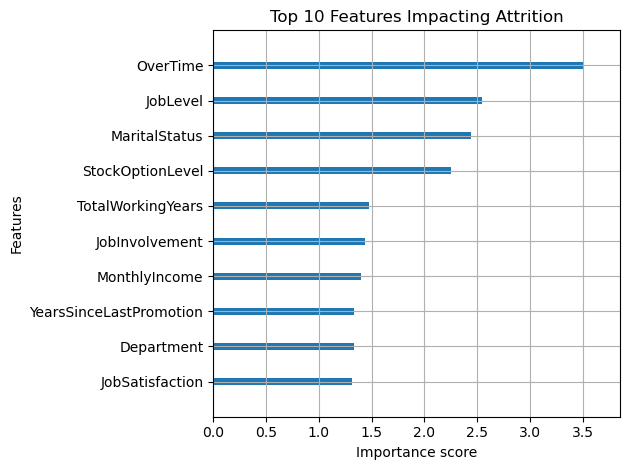

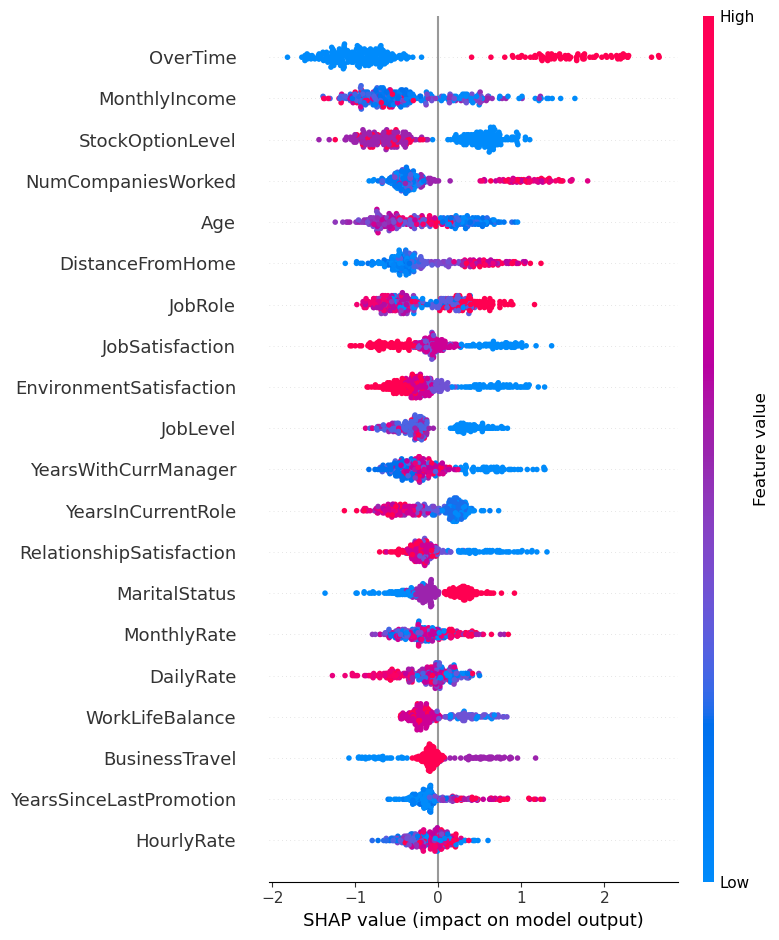

In [2]:
#HR ATTRITION ANALYTICS CODE
# -----------------------------------------------------
# It includes Data processing, predictive modeling (XGBoost), SHAP interpretability, and an interactive Dash dashboard.

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier, plot_importance
import shap
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
import plotly.express as px

# STEP 1: Load and explicitly encode HR dataset
file_path = "D:/SHRM/Projects/HR-Employee-Attrition-All.csv"
df = pd.read_csv(file_path)

# Encode the target explicitly
label_encoders = {}
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Label encode all other categorical (object-type) columns
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# STEP 2: XGBoost - Predict Attrition & Show Feature Importance
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate Model
print("Classification Report:\n", classification_report(y_test, model.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, model.predict(X_test)))

# Plot top 10 most important features influencing attrition
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10, importance_type='gain', show_values=False)
plt.title("Top 10 Features Impacting Attrition")
plt.tight_layout()
plt.show()

# SHAP values for interpretability
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

# STEP 3: Prepare Advanced Interactive Visuals for Dashboard
fig_overtime_income = px.violin(df, x="OverTime", y="MonthlyIncome", color="Attrition",
                                box=True, points="all",
                                title="Monthly Income by Overtime & Attrition")

fig_heatmap = px.density_heatmap(df, x="Age", y="MonthlyIncome", z="Attrition", histfunc="avg",
                                  title="Avg Attrition Rate by Age & Income")

fig_parallel = px.parallel_categories(df, dimensions=["BusinessTravel", "OverTime", "JobRole", "Attrition"],
                                      title="Attrition Patterns Across Categories")

# STEP 4: Build Dash Layout
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    html.H2("Strategic HR Attrition Dashboard", className="text-center my-3 text-primary"),

    # Key Metrics Row
    dbc.Row([
        dbc.Col(html.Div([
            html.H5("Attrition Rate"),
            html.H4(f"{round(df['Attrition'].mean() * 100, 2)}%", className="text-danger")
        ])),
        dbc.Col(html.Div([
            html.H5("Headcount (Active / Left)"),
            html.H4(f"{df[df['Attrition']==0].shape[0]} / {df[df['Attrition']==1].shape[0]}", className="text-success")
        ])),
        dbc.Col(html.Div([
            html.H5("Top Dept by Attrition"),
            html.H4(df.groupby("Department")["Attrition"].mean().idxmax(), className="text-warning")
        ])),
    ], className="mb-4"),

    # Age and Department Graphs
    dbc.Row([
        dbc.Col(dcc.Graph(figure=px.histogram(
            df, x="Age", color="Attrition", barmode="overlay",
            title="Age Distribution by Attrition"
        )), width=6),

        dbc.Col(dcc.Graph(figure=px.bar(
            df.groupby("Department")["Attrition"].mean().reset_index(),
            x="Department", y="Attrition", color="Attrition",
            title="Attrition by Department"
        )), width=6)
    ]),

    # JobRole and DistanceFromHome Graphs
    dbc.Row([
        dbc.Col(dcc.Graph(figure=px.bar(
            df.groupby("JobRole")["Attrition"].mean().reset_index(),
            x="JobRole", y="Attrition", color="Attrition",
            title="Attrition by Job Role"
        )), width=6),

        dbc.Col(dcc.Graph(figure=px.box(
            df, x="Attrition", y="DistanceFromHome", color="Attrition",
            title="Distance from Home vs Attrition"
        )), width=6)
    ]),

    # Performance & Overtime vs Income Graphs
    dbc.Row([
        dbc.Col(dcc.Graph(figure=px.box(
            df, x="PerformanceRating", y="Attrition", color="Attrition",
            title="Performance Rating vs Attrition"
        )), width=6),

        dbc.Col(dcc.Graph(figure=fig_overtime_income), width=6)
    ]),

    # Heatmap & Parallel Category Graphs
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig_heatmap), width=6),
        dbc.Col(dcc.Graph(figure=fig_parallel), width=6)
    ])
], fluid=True)

# 🚀 STEP 5: Run Dashboard Server (Run with: python your_script.py)
if __name__ == '__main__':
    app.run_server(debug=True, port=8053)